<a href="https://colab.research.google.com/github/natiska/ai4trees-height/blob/main/notebooks/Natalia/make_merged_data_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a directory with a merged dataset

This directory contains both Google Drive (Tom's) data and Google Cloud (Justdiggit) data. The test and validation data comes from Google Drive data only.

In [1]:
import glob
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
improved_label_available = False

In [5]:
if improved_label_available:
  DRIVE_DATA_PATH = '/content/drive/MyDrive/AI for Trees Share/01. Data/Tiles/256x256'
  DRIVE_DATA_PATHS = {"RGB": f'{DRIVE_DATA_PATH}/imgs',
                      "DSM": f'{DRIVE_DATA_PATH}/height',
                      "masks": f'{DRIVE_DATA_PATH}/labels'}
else:
  DRIVE_DATA_PATH = '/content/drive/MyDrive/AIFT'
  DRIVE_DATA_PATHS = {"RGB": f'{DRIVE_DATA_PATH}/temp/Tree_RGB',
                      "DSM": f'{DRIVE_DATA_PATH}/patches_ann_DEM',
                      "masks": f'{DRIVE_DATA_PATH}/patches_ann_masks'}
CLOUD_DATA_PATH = '/content/drive/MyDrive/AI for Trees Share/01. Data/justdiggit-drone-data'
CLOUD_DATA_PATHS = {"RGB": f'{CLOUD_DATA_PATH}/RGB/tiles_1000_tif',
                    "DSM": f'{CLOUD_DATA_PATH}/DSM/tiles_250_png',
                    "masks": f'{CLOUD_DATA_PATH}/masks'}
MERGED_DATA_PATH = '/content/drive/MyDrive/AI for Trees Share/01. Data/merged_data'

## Transfer Google Drive data while dividing it into predefined test, validation and test sets

In [6]:
predefined_sets = {"test": ['L18', 'C13', 'T31', 'M20', 'M12', 'T1', 'N3'],
                   "validation": ['ZK12', 'ZK17', 'C10', 'ZB2', 'ZK16', 'T5', 'T40', 'ZK10'],
                   "train": ['ZK14', 'T74', 'C9', 'ZK11', 'ZB3', 'ZB1', 'L16', 'T37', 'ZK15',
                              'T34', 'T9', 'M10', 'ZK7', 'M1', 'ZK21', 'C12', 'ZK18', 'T66',
                              'ZK13', 'ZK9', 'C14', 'T7', 'T63', 'N13']}


In [7]:
# Create output folder structure
for partition in predefined_sets:
    for data_type in ["RGB", "DSM", "masks"]:
      output_path = os.path.join(MERGED_DATA_PATH, partition, data_type)
      if os.path.exists(output_path) == False:
        os.makedirs(output_path)

In [37]:
for partition in predefined_sets:
  print(partition)
  for img_id in predefined_sets[partition]:
    tile_paths = glob.glob(os.path.join(DRIVE_DATA_PATHS["RGB"], f"{img_id}_*.png"))
    for tile_path in tile_paths:
      filename = tile_path.split("/")[-1]
      #print(filename)
      # check if the file contains any data, not just black background
      contains_data = True # TODO!!!
      if contains_data:
        for data_type in ["RGB", "DSM", "masks"]:
          src_path = os.path.join(DRIVE_DATA_PATHS[data_type], filename)
          out_path = os.path.join(MERGED_DATA_PATH, partition, data_type, filename)
          try:
            shutil.copy(src_path, out_path)
          except FileNotFoundError:
            try:
              shutil.copy(os.path.join(DRIVE_DATA_PATHS[data_type], "2019", filename), out_path)
            except FileNotFoundError:
              try:
                shutil.copy(os.path.join(DRIVE_DATA_PATHS[data_type], "2021", filename), out_path)
              except:
                raise

test
validation
train


## Resize the Cloud data to be 256x256 and save in justdiggit-drone-data

In [ ]:
path_to_the_file = f"{CLOUD_DATA_PATH}/DSM/tiles_250_png/chaludewa/2019/chaludewa_year_2019_tile_2000_4000.png"

In [ ]:
from PIL import Image
image = Image.open(path_to_the_file)

In [ ]:
resized_image = image.resize((256, 256))

In [ ]:
resized_image.save("resized2.jpg")

In [ ]:
resized_image.size

(256, 256)

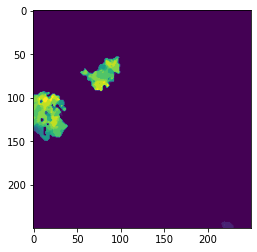

In [ ]:
plt.imshow(image)

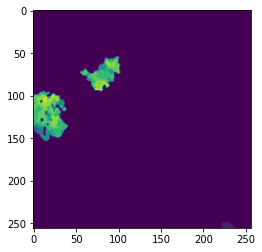

In [ ]:
plt.imshow(Image.open("resized2.png"))

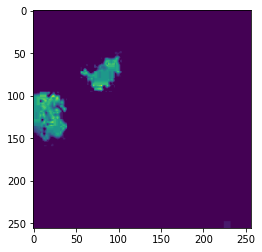

In [ ]:
plt.imshow(Image.open("resized2.jpg"))

In [ ]:
for data_type in CLOUD_DATA_PATHS:
  tile_paths = glob.glob(CLOUD_DATA_PATHS[data_type] + "/*/*/*")
  for tile_path in tile_paths:
    filename = tile_path.split("/")[-1].split(".")[0]
    image = Image.open(tile_path)
    resized_image = image.resize((256, 256))
    resized_image.save(os.path.join(CLOUD_DATA_PATH, data_type, "tiles_256_png", filename + ".png"))

### Copy these files to the MERGED_DATA directories

Justdiggit data is included only in the training partition

In [ ]:
for data_type in CLOUD_DATA_PATHS:
  print(data_type)
  for src_file in glob.glob(os.path.join(CLOUD_DATA_PATH, data_type, "tiles_256_png/*")):
    shutil.copy(src_file, os.path.join(MERGED_DATA_PATH, "train", data_type))

## Compute some stats about this dataset

In [31]:
train_tiles = glob.glob(MERGED_DATA_PATH + "/train/RGB/*")

In [32]:
len(train_tiles)

411

In [34]:
drive_tiles_rgb = glob.glob(DRIVE_DATA_PATHS["RGB"] + "/*")

In [35]:
len(drive_tiles_rgb)

636

In [33]:
drive_tiles_dem = glob.glob(DRIVE_DATA_PATHS["DSM"] + "/*/*")
len(drive_tiles_dem)

636

In [44]:
from PIL import Image
import numpy as np

In [47]:
train_tiles[0]

'/content/drive/MyDrive/AI for Trees Share/01. Data/merged_data/train/RGB/chaludewa_year_2019_tile_0_11000.png'

In [42]:
img = Image.open(train_tiles[0])
img.size


(256, 256)

In [46]:
array = np.array(img)
array.shape

(256, 256, 4)

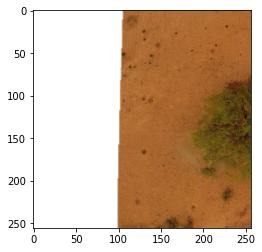

In [57]:
plt.imshow(array[:,:,:])

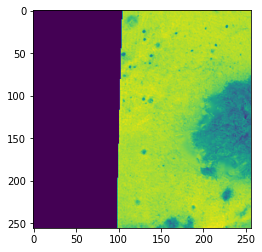

In [50]:
plt.imshow(array[:,:,0])

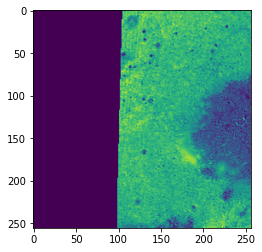

In [51]:
plt.imshow(array[:,:,2])

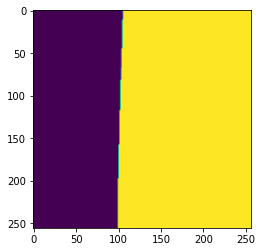

In [52]:
plt.imshow(array[:,:,3])

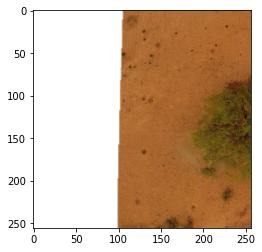

In [55]:
plt.imshow(img)

In [58]:
array2 = array[:,:,:-1]

In [59]:
array2.shape

(256, 256, 3)

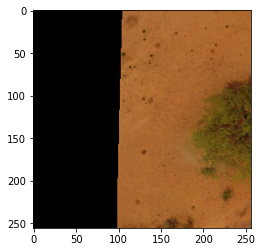

In [61]:
plt.imshow(array2)